# Importing Data

In [1]:
# pip install xgboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew,kurtosis

from sklearn.datasets import load_breast_cancer as lbc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier,plot_tree

# import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')


In [3]:
df=lbc(as_frame=True).frame
cn=lbc().target

In [4]:
df.shape

(569, 31)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
x,y=df.iloc[:,:-1],df.iloc[:,-1]
x.values

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
x.shape

(569, 30)

In [8]:
mnx=StandardScaler()
x_scl=mnx.fit_transform(x.values)

In [9]:
x_scl.shape

(569, 30)

In [10]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

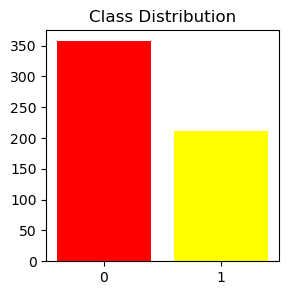

In [11]:
plt.figure(figsize=(3,3))
plt.title('Class Distribution')
plt.bar([0,1],[357,212],color=['red','yellow'],align='center')
plt.xticks([0,1])
plt.show()

In [12]:
pca=PCA(n_components=16)
X=pca.fit_transform(x_scl)

In [13]:
pca.explained_variance_ratio_
var = pca.explained_variance_ratio_

In [14]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([44.27, 63.24, 72.63, 79.23, 84.73, 88.75, 91.  , 92.59, 93.98,
       95.15, 96.13, 97.  , 97.8 , 98.32, 98.63, 98.9 ])

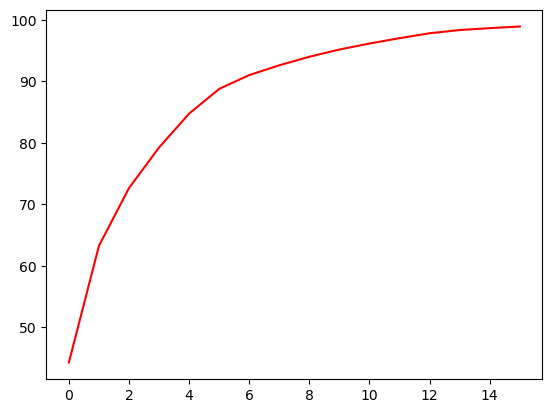

In [15]:
plt.plot(var1,color="red")
plt.show()

In [16]:
X.shape

(569, 16)

In [17]:
tsne=TSNE()
viz=tsne.fit_transform(x_scl)
viz.shape

(569, 2)

In [18]:
pd.DataFrame(viz)[0]

0     -32.298943
1     -21.072256
2     -26.092493
3     -12.734888
4     -22.091175
         ...    
564   -28.073870
565   -24.997248
566   -11.249941
567   -33.436180
568     7.391580
Name: 0, Length: 569, dtype: float32

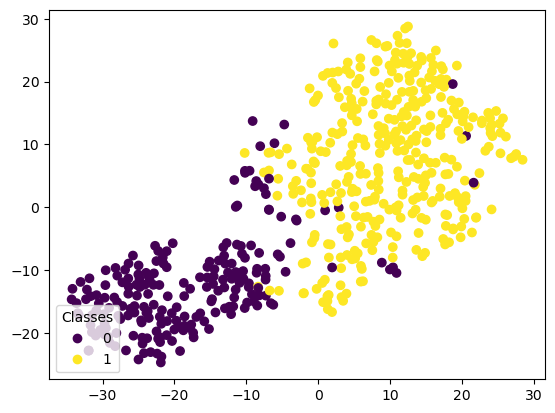

In [19]:
scatter=plt.scatter(pd.DataFrame(viz)[0],pd.DataFrame(viz)[1],c=cn)
plt.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
plt.show()

In [20]:
x_tr,x_t,y_tr,y_t=train_test_split(X,y,test_size=20)

In [21]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [22]:
dtc.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=4)

In [23]:
pred=dtc.predict(x_t)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [24]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_precision_recall_curve

In [25]:
print(classification_report(y_t,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



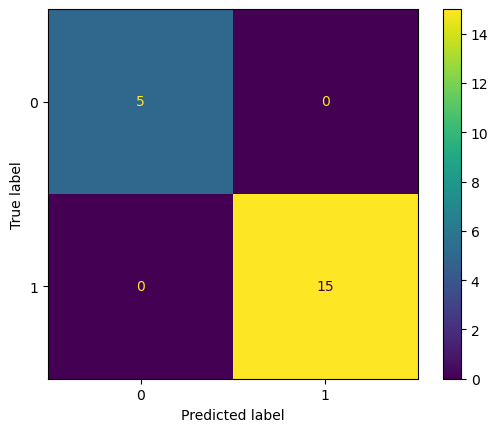

In [26]:
plot_confusion_matrix(dtc,x_t,y_t)
plt.show()

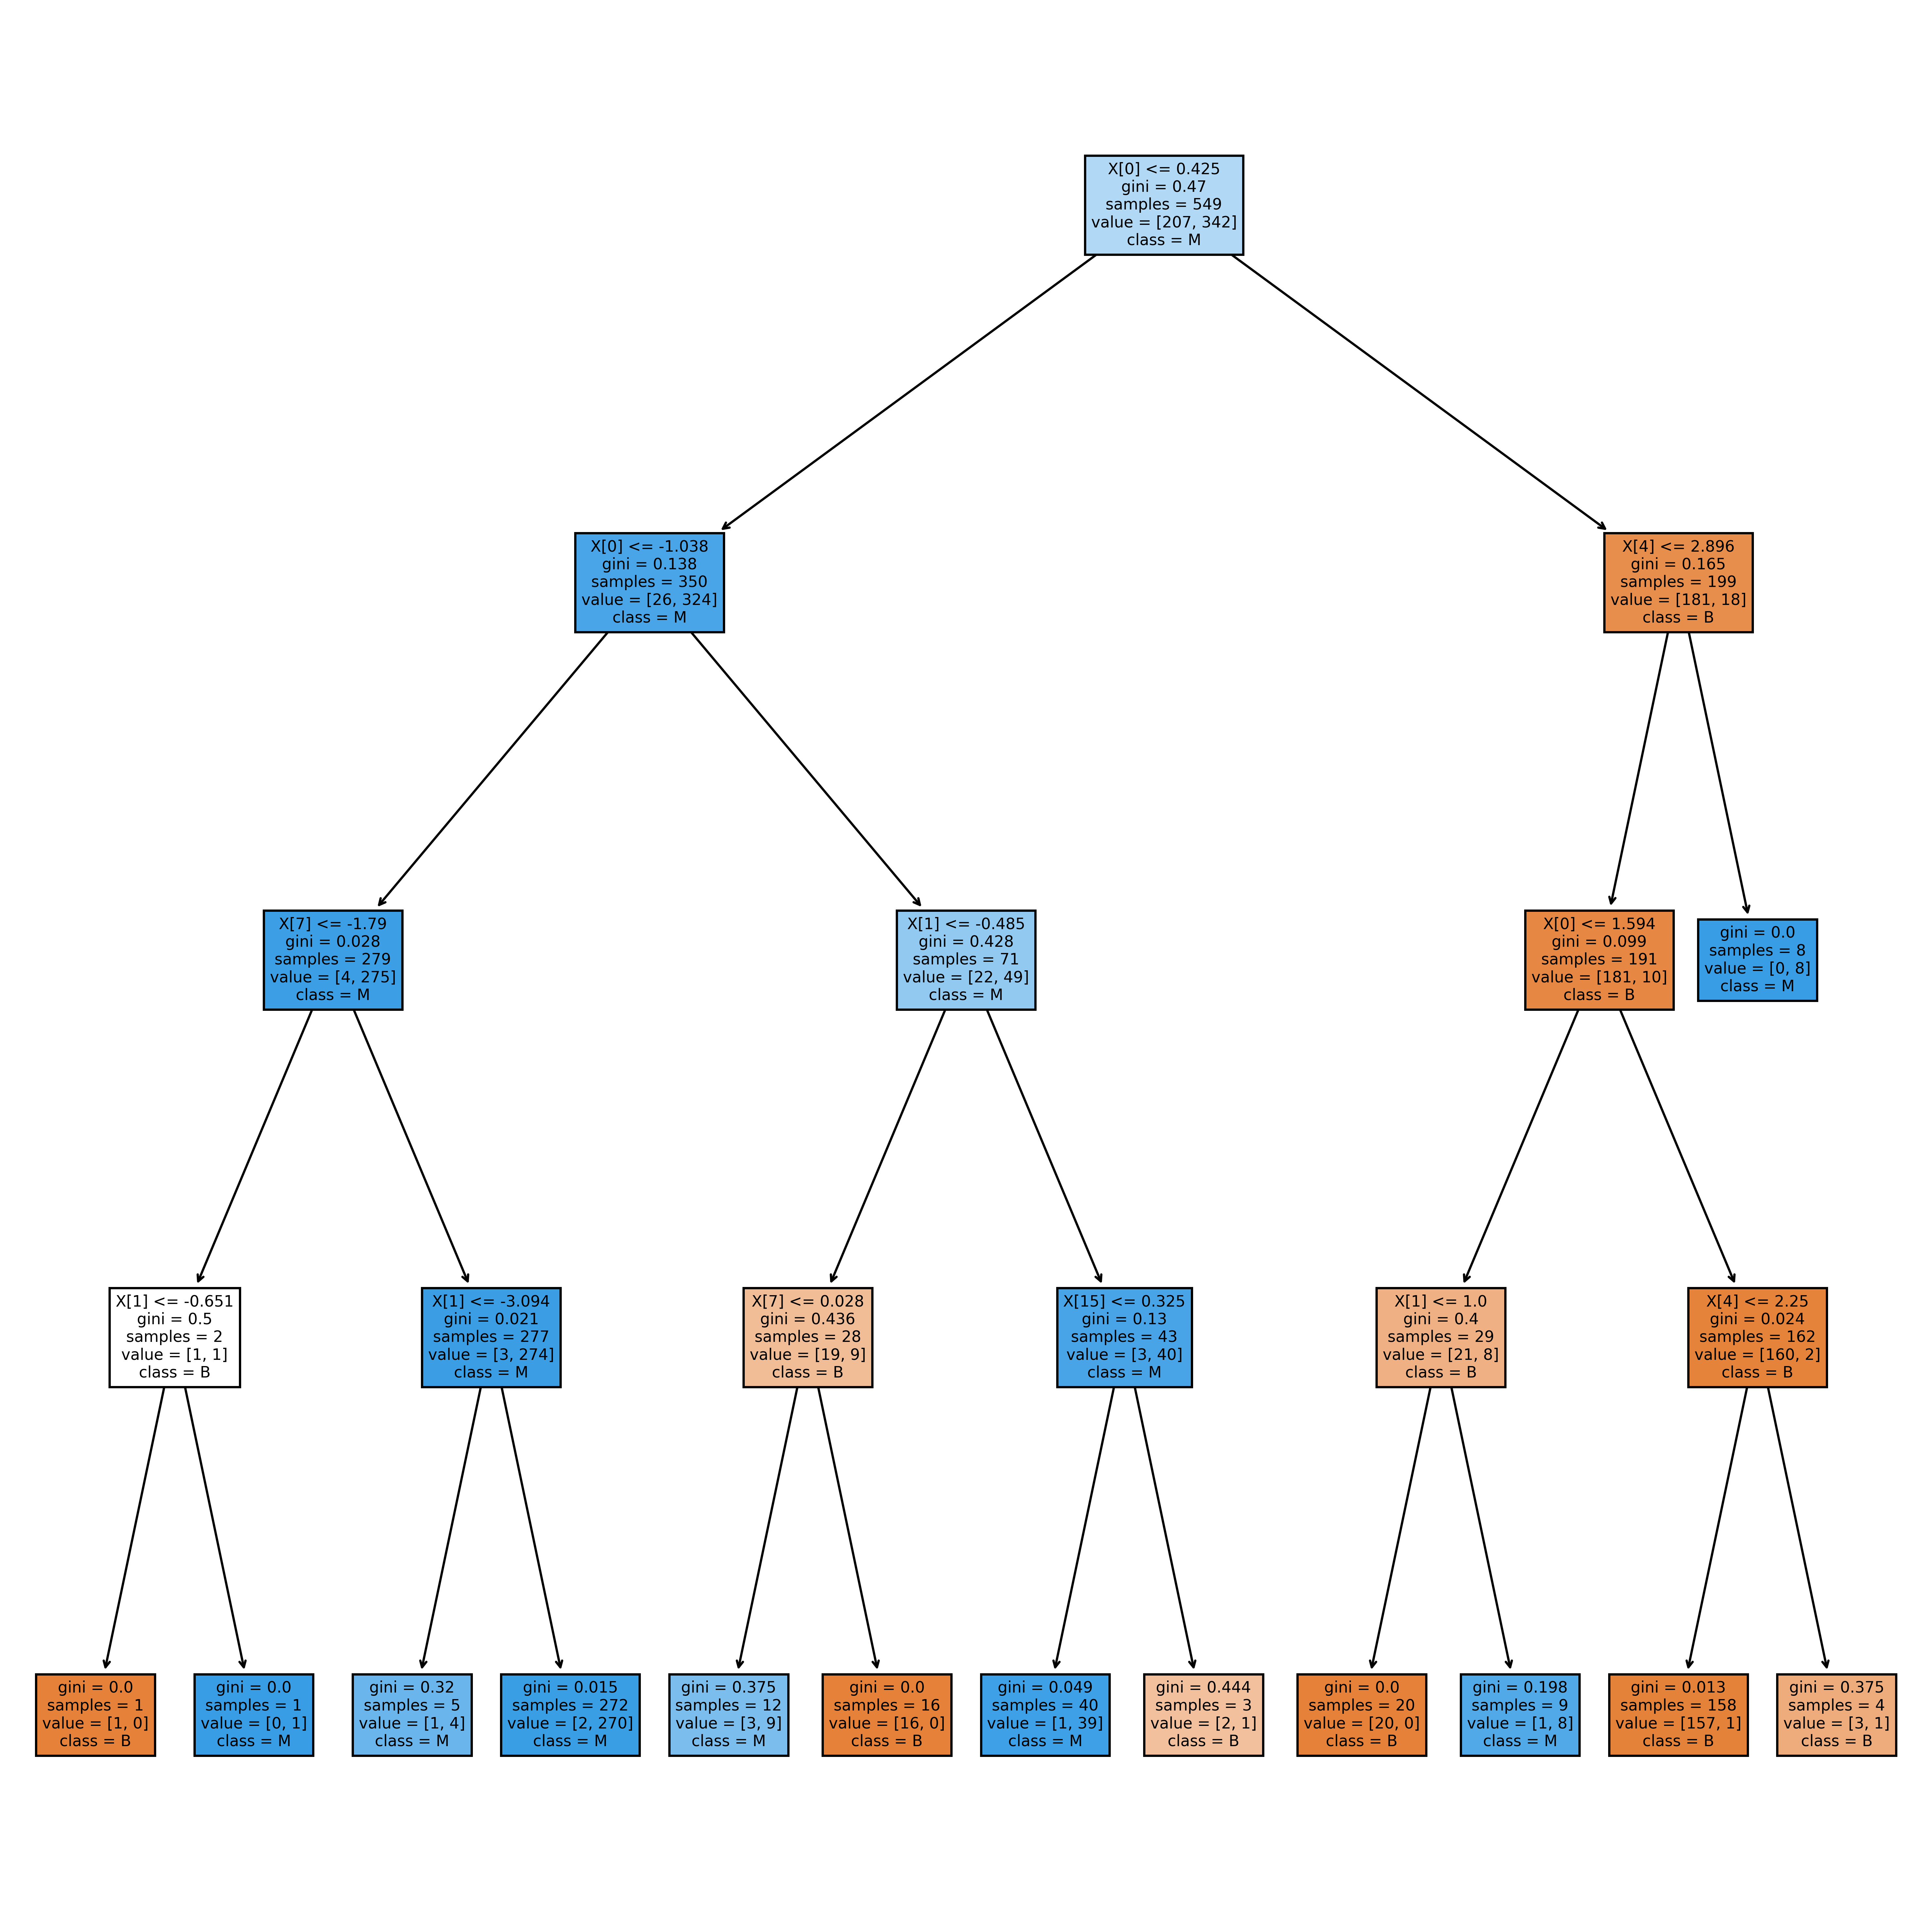

In [27]:
plt.figure(figsize=(15,15),dpi=500)
plot_tree(dtc,filled=True,class_names=['B','M'])
plt.show()

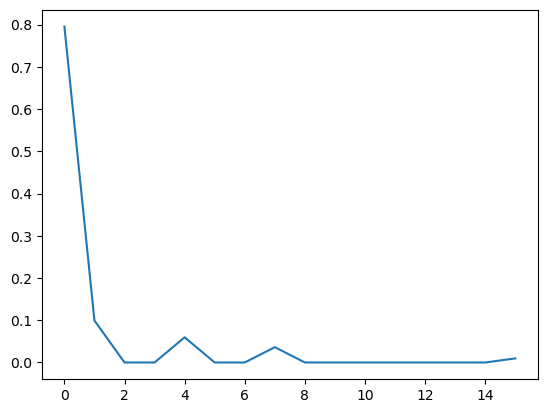

In [28]:
plt.plot(dtc.feature_importances_)
plt.show()